<html>
<body>
<h1 style="background-color: #022851;">
<center>
<br><font size="+2">
<font color=#FFBF00><b>Data Analysis Project</b></font>
</font>
<br><font size="+1.5">
<font color=#FFBF00><b>Python for Data Analysis   |   UC Davis CPE   |   Sports Group</b></font>
</font>
<br>
</center>
<font size="+1">
<font color=#FFBF00>
<b>Group Members -</b>
<ul style="text-align: left;">
<li><b>Kyle Andrews</b></li>
<li><b>Joshua Darilek</b></li>
<li><b>Austin Maguire</b></li>
<li><b>Rene Espinoza Pacheco</b></li>
</ul>
</font>
</font>
</h1>
</body>
</html>
<br>


# Introduction and Overview



Maintaining and analyzing performance metrics for NBA players is crucial for both the teams involved, and the expansive reach of fan interactions with the sport as a whole. These metrics provide a quantitative way to assess a player's contributions to the team, helping coaches and analysts understand each player's strengths and weaknesses. Through informed decision making teams can use individual and team performance data to make strategic decisions during games, such as which players to put on the court, and which matchups to exploit, and adjustments to make. Teams rely on this data to properly inform contract and trade negotiations, and guide coaching and player development. Beyond that, comprehensive player metrics provide fans a deeper understanding of the game, allowing them to engage in a more meaningful way; analyzing player performances, and predicting outcomes. According to the American Gaming Association: "Americans wagered a record $119.84 billion on sports betting in 2023, up 27.5% from 2022. This growing industry relies heavily on player's metrics to properly evaluate and predict future performance.

The purpose of this notebook is to determine two main objectives in regards to average player contribution predictions. The first research question we will explore is which offensive metric is most strongly associated with player points scored. The second objective is to determine which defensive metric is most strongly associated with a player’s average plus/minus per game.

### Hypotheses

Hypothesis 1: Which of the primary offensive metrics is the strongest driver of points per game (PPG)?
<br>
Hypothesis 2: Which of the primary defensive metrics is the strongest driver of a player's plus/minus number?


### Dataset Variables and Descriptions

Dataset Information from - 
https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season

| Column | Description |
|--------|-------------|
| `PName` | The name of the basketball player |
| `POS` | The player's position in the game, including 'N/A' |
| `Team` | The abbreviation of the team the player is currently playing for this season |
| `Age` | The age of the player |
| `GP` | The total number of games the player has played in this season |
| `W` | The total number of games won by the player |
| `L` | The total number of games lost by the player |
| `Min` | The total minutes the player has played in this season |
| `PTS` | **The total points made by the player [target]** |
| `FGM` | The total number of field goals made by the player |
| `FGA` | The total number of field goals attempted by the player |
| `FG%` | The percentage of successful field goals made by the player |
| `3PM` | The total number of 3-point field goals made by the player |
| `3PA` | The total number of 3-point field goals attempted by the player |
| `3P%` | The percentage of successful 3-point field goals made by the player |
| `FTM` | The total number of free throws made by the player |
| `FTA` | The total number of free throws attempted by the player |
| `FT%` | The percentage of successful free throws made by the player |
| `OREB` | The total number of offensive rebounds made by the player |
| `DREB` | The total number of defensive rebounds made by the player |
| `REB` | The total number of rebounds (offensive + defensive) made by the player |
| `AST` | The total number of assists made by the player |
| `TOV` | The total number of turnovers made by the player |
| `STL` | The total number of steals made by the player |
| `BLK` | The total number of blocks made by the player |
| `PF` | The total number of personal fouls made by the player |
| `FP` | The total number of NBA fantasy points made by the player |
| `DD2` | The total number of double-doubles made by the player |
| `TD3` | The total number of triple-doubles made by the player |
| `+/-` | The total difference between the player's team scoring and the opponents' scoring while the player is in the game |

# Data Exploration & Cleaning

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import statsmodels.api as sm
import scipy.stats as stats

### Import dataset

In [2]:

# Read the CSV file
nba_player_stats = pd.read_csv('2023_nba_player_stats.csv')

### Missing values

In [3]:
# Check for missing values
null_counts = nba_player_stats.isnull().sum()
for column, count in null_counts.items():
    if count > 0:
        print(f"{count} rows in column {column} are null")

# Calculate row count

len(nba_player_stats)

5 rows in column POS are null


539

In [4]:
# Since our hypotheses are based on position and there are five players with null values for position, we'll drop those five from the dataframe.

nba_player_stats = nba_player_stats.dropna()
nba_player_stats.reset_index()

# Row count of new df

len(nba_player_stats)


534

In [5]:

# Display information about the dataset
print(nba_player_stats.info())

# Calculate and display basic statistics for numerical columns
print(nba_player_stats.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 0 to 533
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   534 non-null    object 
 1   POS     534 non-null    object 
 2   Team    534 non-null    object 
 3   Age     534 non-null    int64  
 4   GP      534 non-null    int64  
 5   W       534 non-null    int64  
 6   L       534 non-null    int64  
 7   Min     534 non-null    float64
 8   PTS     534 non-null    int64  
 9   FGM     534 non-null    int64  
 10  FGA     534 non-null    int64  
 11  FG%     534 non-null    float64
 12  3PM     534 non-null    int64  
 13  3PA     534 non-null    int64  
 14  3P%     534 non-null    float64
 15  FTM     534 non-null    int64  
 16  FTA     534 non-null    int64  
 17  FT%     534 non-null    float64
 18  OREB    534 non-null    int64  
 19  DREB    534 non-null    int64  
 20  REB     534 non-null    int64  
 21  AST     534 non-null    int64  
 22  TOV    

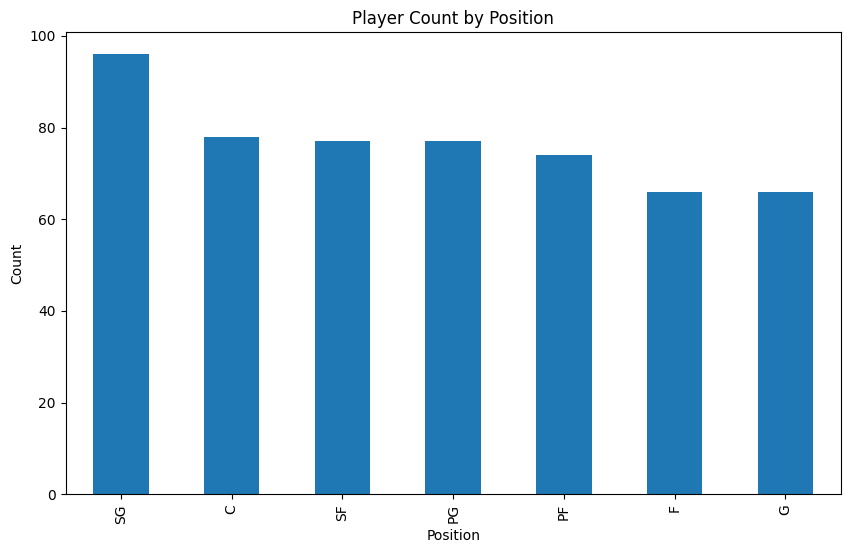

In [6]:
# Visualize distribution of positions
plt.figure(figsize=(10,6))
nba_player_stats['POS'].value_counts().plot(kind='bar')
plt.title('Player Count by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

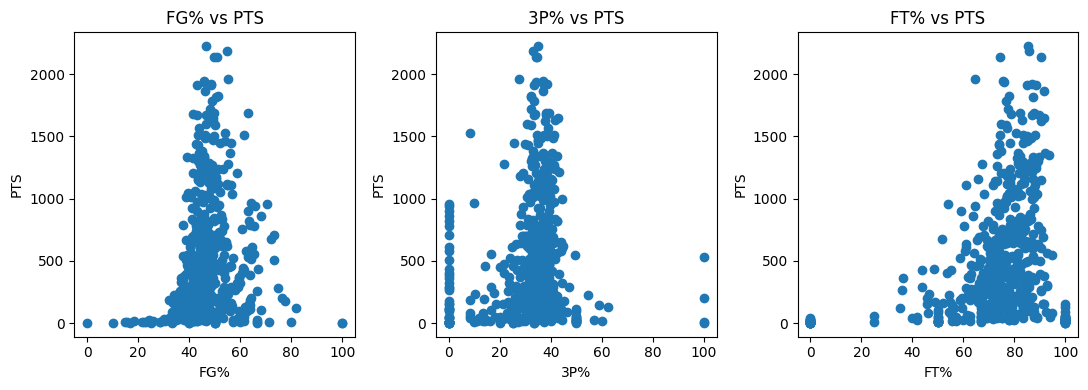

In [7]:
###############################################################################
# Scatter plots for research question 1 (RQ1)
# RQ1: Which offensive shooting percentage metric - 
#   field goal percentage (FG%), 
#   three-point percentage (3P%), 
#   or free throw percentage (FT%),
#   is most strongly associated with player average points per game, by position? 
###############################################################################
fig, axs = plt.subplots(1, 3, figsize=(11, 4))
axs = axs.ravel()

# Offensive metrics vs PTS
axs[0].scatter(nba_player_stats['FG%'], nba_player_stats['PTS'])
axs[0].set_title('FG% vs PTS')
axs[0].set_xlabel('FG%')
axs[0].set_ylabel('PTS')

axs[1].scatter(nba_player_stats['3P%'], nba_player_stats['PTS'])
axs[1].set_title('3P% vs PTS')
axs[1].set_xlabel('3P%')
axs[1].set_ylabel('PTS')

axs[2].scatter(nba_player_stats['FT%'], nba_player_stats['PTS'])
axs[2].set_title('FT% vs PTS')
axs[2].set_xlabel('FT%')
axs[2].set_ylabel('PTS')

plt.tight_layout()
plt.show()


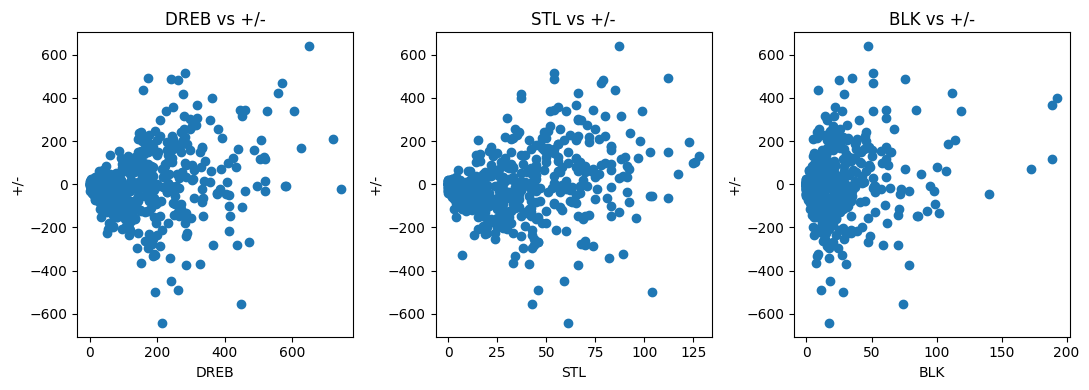

In [8]:
###############################################################################
# Scatter plots for Research Question 2 (RQ2)
# Which defensive metric - 
#   defensive rebounds (DREB), 
#   steals (STL),
#   or blocks (BLK),
#   is most strongly associated with a player’s average plus/minus per game, by position?
###############################################################################
fig, axs = plt.subplots(1, 3, figsize=(11, 4))
axs = axs.ravel()

axs[0].scatter(nba_player_stats['DREB'], nba_player_stats['+/-'])
axs[0].set_title('DREB vs +/-')
axs[0].set_xlabel('DREB')
axs[0].set_ylabel('+/-')

axs[1].scatter(nba_player_stats['STL'], nba_player_stats['+/-'])
axs[1].set_title('STL vs +/-')
axs[1].set_xlabel('STL')
axs[1].set_ylabel('+/-')

axs[2].scatter(nba_player_stats['BLK'], nba_player_stats['+/-'])
axs[2].set_title('BLK vs +/-')
axs[2].set_xlabel('BLK')
axs[2].set_ylabel('+/-')

plt.tight_layout()
plt.show()

In [9]:
def analyze_hypothesis(df, pos_groups, predictor_vars, target_var):
    """
    Analyze a hypothesis by calculating correlations for different position groups.

    Args:
        df (pd.DataFrame): The input DataFrame containing player statistics.
        pos_groups (list): List of position groups to analyze.
        predictor_vars (list): List of predictor variables for correlation.
        target_var (str): The target variable for correlation.

    Returns:
        pd.DataFrame: A DataFrame containing the correlation results for each position group.
    """
    results = []
    for pos_group in pos_groups:
        pos_data = df[df['POS'].isin(pos_group)]
        
        for var in predictor_vars:
            correlation, p_value = stats.pearsonr(pos_data[var], pos_data[target_var])
            results.append({
                'Position': '+'.join(pos_group),
                'Predictor': var,
                'Correlation': correlation,
                'P-value': p_value
            })
    
    return pd.DataFrame(results)

def analyze_hypothesis_1(df):
    """
    Analyze Hypothesis 1: Which offensive shooting percentage metric is most strongly 
    associated with player average points per game, by position?
    """
    pos_groups = [['PG'], ['SG'], ['SF', 'PF'], ['C']]
    predictor_vars = ['3P%', 'FT%', 'FG%']
    target_var = 'PTS'
    return analyze_hypothesis(df, pos_groups, predictor_vars, target_var)

def analyze_hypothesis_2(df):
    """
    Analyze Hypothesis 2: Which defensive metric is most strongly associated with 
    a player's average plus/minus per game, by position?
    """
    pos_groups = [['PG', 'SG'], ['SF', 'PF'], ['C']]
    predictor_vars = ['DREB', 'STL', 'BLK']
    target_var = '+/-'
    return analyze_hypothesis(df, pos_groups, predictor_vars, target_var)

# Run the analyses
results_h1 = analyze_hypothesis_1(nba_player_stats)
results_h2 = analyze_hypothesis_2(nba_player_stats)

# Display the results
print("Results for Hypothesis 1:")
print(results_h1.round(4))
print("\nResults for Hypothesis 2:")
print(results_h2.round(4))

Results for Hypothesis 1:
   Position Predictor  Correlation  P-value
0        PG       3P%       0.3681   0.0010
1        PG       FT%       0.4013   0.0003
2        PG       FG%       0.4949   0.0000
3        SG       3P%       0.1408   0.1711
4        SG       FT%       0.2711   0.0075
5        SG       FG%       0.1642   0.1098
6     SF+PF       3P%       0.2190   0.0069
7     SF+PF       FT%       0.2805   0.0005
8     SF+PF       FG%       0.2538   0.0017
9         C       3P%       0.0265   0.8179
10        C       FT%       0.2553   0.0241
11        C       FG%       0.0916   0.4249

Results for Hypothesis 2:
  Position Predictor  Correlation  P-value
0    PG+SG      DREB       0.2791   0.0002
1    PG+SG       STL       0.2289   0.0025
2    PG+SG       BLK       0.2645   0.0004
3    SF+PF      DREB       0.3234   0.0001
4    SF+PF       STL       0.2666   0.0009
5    SF+PF       BLK       0.2224   0.0061
6        C      DREB       0.2194   0.0536
7        C       STL       0.32

### Hypothesis 1 (Offensive metrics vs. Points per game):
**Point Guards (PG):**  
FG% (0.4949, p < 0.0001)  
FT% (0.4013, p = 0.0003)  

**Shooting Guards (SG):**  
FT% (0.2711, p = 0.0075)  
FG% (0.1642, p = 0.1098) - not statistically significant  

**Forwards (SF+PF):**  
FT% (0.2805, p = 0.0005)  
FG% (0.2538, p = 0.0017)  

**Centers (C):**  
FT% (0.2553, p = 0.0241)  
FG% (0.0916, p = 0.4249) - not statistically significant  

### Hypothesis 2 (Defensive metrics vs. Plus/Minus):
**Guards (PG+SG):**  
DREB (0.2791, p = 0.0002)  
BLK (0.2645, p = 0.0004)  

**Forwards (SF+PF):**  
DREB (0.3234, p = 0.0001)
STL (0.2666, p = 0.0009)  

**Centers (C):**  
STL (0.3286, p = 0.0033)  
BLK (0.2770, p = 0.0141)  


| Position | Most Closely Correlated | Second Most Closely Correlated |
|----------|-------------------------|--------------------------------|
| **Hypothesis 1: Offensive Metrics vs. Points per Game** |
| Point Guards | FG% | FT% |
| Shooting Guards | FT% | N/A |
| Forwards | FT% | FG% |
| Centers | FT% | N/A |
| **Hypothesis 2: Defensive Metrics vs. Plus/Minus** |
| Guards | DREB | BLK |
| Forwards | DREB | STL |
| Centers | STL | BLK |

Note: For Shooting Guards and Centers in Hypothesis 1, there is only one predictor listed, as "N/A" is used for the second column since only one statistically significant predictor was identified.

# Data Analysis

### Hypothesis 1: Which of the primary offensive metrics is the strongest driver of points per game (PPG)?



In [10]:
#define predictor and response variables
y = nba_player_stats['PTS']
x = nba_player_stats[['FTM', '3PM', 'OREB', 'STL']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
points_model = sm.OLS(y, x).fit()

#view model summary
print(points_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     3142.
Date:                Fri, 06 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:54:23   Log-Likelihood:                -3216.7
No. Observations:                 534   AIC:                             6443.
Df Residuals:                     529   BIC:                             6465.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7691      7.195      0.246      0.8

Based on a multiple regression, the strongest offensive predictor of total points scored is three pointers made, followed by free throws made, steals, and offensive rebounds.

### Hypothesis 2: Which of the primary defensive metrics is the strongest driver of a player's plus/minus number?

In [11]:
#define predictor and response variables
y = nba_player_stats['+/-']
x = nba_player_stats[['DREB', 'STL', 'BLK']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
plus_minus_model = sm.OLS(y, x).fit()

#view model summary
print(plus_minus_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    +/-   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     14.75
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           3.09e-09
Time:                        19:54:23   Log-Likelihood:                -3407.6
No. Observations:                 534   AIC:                             6823.
Df Residuals:                     530   BIC:                             6840.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.6303     10.023     -5.151      0.0

Based on a multiple regression, the strongest defensive predictor of a player's plus/minus number is steals, followed by blocks, and finally defensive rebounds.

# Data Visualizations

# Recommendations